# The Music of the Sphere: Fourier Series Representation of the Horizon-scale Potential

*Phil Marshall, Laurence Perreault Levasseur and Roger Blandford, August-October 2015*

In this notebook we look at some simulated potential fields, and predict the CMB temperature map from them.

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
%matplotlib inline
import healpy as hp
import numpy as np
import beatbox


1


# 1. Generating and Visualizing a 3D Potential

Our plan is to use a simple Fourier series, with terms lying within some sphere in k-space, to represent the potential on horizon scales. Let's instantiate such a "beatbox" universe and generate a Gaussian random potential field in it, using a simple inflation model to generate a power spectrum and then populate the covariance matrix.

In [3]:
We = beatbox.Universe()
We.generate_a_random_potential_field(truncated_nmax=We.truncated_nmax, truncated_nmin=1, Pdist=1, Pmax=np.pi, Pvar=np.pi/8)

Generated  122  potential Fourier coefficients
 with phases uniformly distributed between 0 and  3.14159265359
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.0002829


beatbox/universe.py:546: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*1000*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))


Now, let's visualize the 3D potential field, with `yt`. We're trying to make a plot like [this one](http://yt-project.org/doc/_images/vr_sample.jpg), as shown in the [volume rendering tutorial](http://yt-project.org/doc/visualizing/volume_rendering.html). [This `gist` (from Sam Skillman)](https://gist.github.com/samskillman/0e574d1a4f67d3a3b1b1) uses a development version of `yt` to do the rendering, but does show how to use `yt` data structures.

In [4]:
import yt 

yt : [INFO     ] 2016-02-17 00:44:56,747 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 00:44:56,747 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 00:44:56,748 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 00:44:56,749 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 00:44:56,750 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 00:44:56,796 Loading field plugins.
yt : [INFO     ] 2016-02-17 00:44:56,797 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 00:44:56,797 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 00:44:56,798 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 00:44:56,799 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 00:44:56,801 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 00:44:56,802 Loaded geometric (112 ne

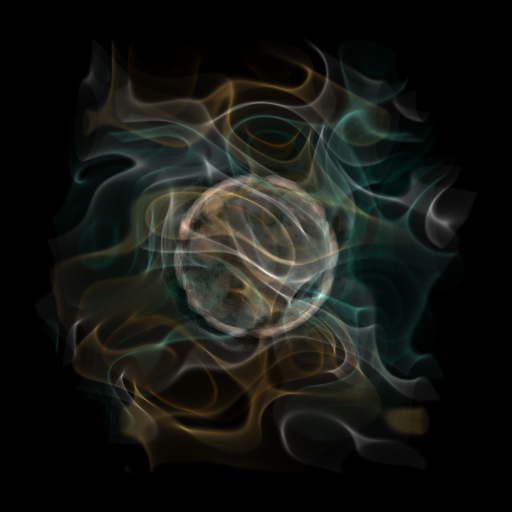

In [111]:
We.show_potential_with_yt(angle=np.pi/8,  N_layer=6, cmap='BrBG', show3D=1)

This is without the frame of the box Universe. The sphere in white represents the CMB surface. If we add the frame, we get:

In [129]:
from IPython.core.display import Image
Image(url='Demo_figures/opac_phi3Ddomain.png',width=600)

In [ ]:
# We can also make a movie, but for noe it jump at pi/4 angles for a reason I dont understand.
We.show_potential_from_all_angles_with_yt(output='scratch/phi5.gif')

In [130]:
from IPython.core.display import Image
Image(url='Demo_figures/phi5.gif',width=500)


# 2. Predicting the CMB Temperature Map

When we get to doing the inverse problem, we sample from the posterior PDF for the potential coefficients $f_n$, and need to check that these models are indeed plausible. The first model check we will do will be visual, and will involve making mock CMB temperature maps for our model potentials (see [issue 8](https://github.com/rogerblandford/Music/issues/8)).

To make CMB temperature maps from the 3D potentials, let's convert the Fourier coefficients $f_n$ into $a_{lm}$'s, using the appropriate response matrix $\mathbf{R}$:

First, let's look at a simulation that includes Fourier modes up to $n=3$ and display the CMB spherical harmonics from $l=1$ up to $l_{max}=10$.  


Generated  122  potential Fourier coefficients
 with phases uniformly distributed between 0 and  3.14159265359
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.0002435
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


beatbox/universe.py:546: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*1000*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))


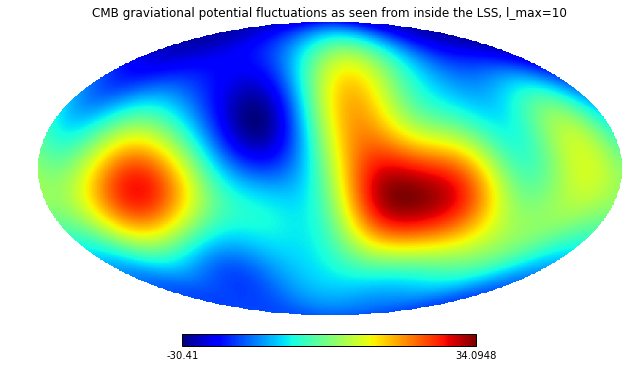

In [117]:
#Simulation with lmax=10
We=beatbox.Universe()
We.truncated_nmax=3
We.truncated_lmax=10
We.generate_a_random_potential_field(truncated_nmax=We.truncated_nmax, truncated_nmin=1, Pdist=1, Pmax=np.pi, Pvar=np.pi/8)
We.transform_3D_potential_into_alm(truncated_nmax=3, truncated_nmin=1,truncated_lmax=10, truncated_lmin=0,usedefault=0)
We.show_CMB_T_map(from_perspective_of="observer")

yt : [INFO     ] 2016-02-17 12:21:20,617 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 12:21:20,619 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 12:21:20,620 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 12:21:20,622 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 12:21:20,623 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 12:21:20,699 Loading field plugins.
yt : [INFO     ] 2016-02-17 12:21:20,701 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 12:21:20,702 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 12:21:20,704 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 12:21:20,705 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 12:21:20,706 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 12:21:20,707 Loaded geometric (112 ne

1



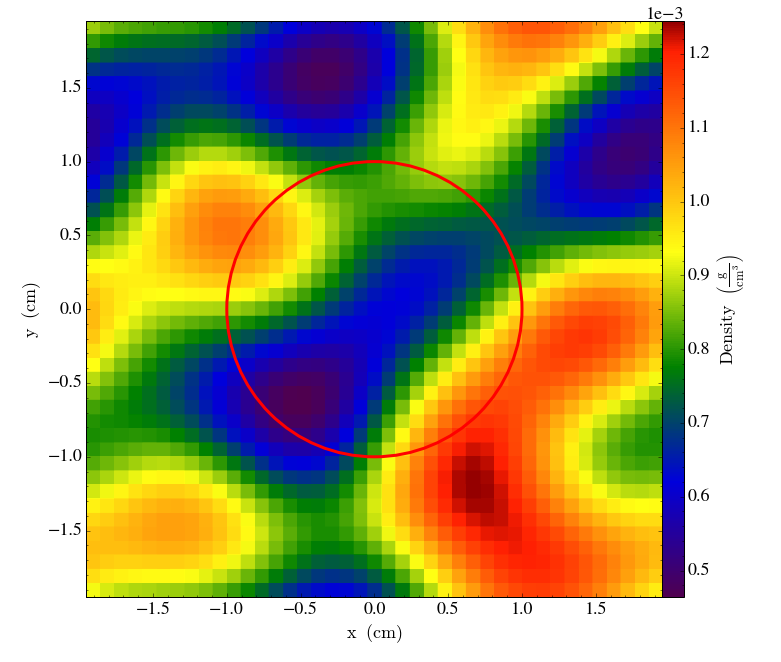

yt : [INFO     ] 2016-02-17 12:21:25,867 Saving plot phi_Slice_z_density.png


In [128]:
# We can also show the slice of the volume at z=0, with the cut through the CMB sphere shown as a red circle.
# The density fluctuations that intersect the red circle are represented along the galatic plane of the CMB Mollweide
#  projection
import yt
We.show_potential_with_yt(N_layer=5, alpha_norm=1.0, cmap='BrBG', Proj=0, Slice=1, gifmaking=0, show3D=0)

We now simulate a Universe with $n_{max}=6$ and plot spherical harmonics up to $l_{max}=30$.

Generated  924  potential Fourier coefficients
 with phases uniformly distributed between 0 and  3.14159265359
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.000327
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


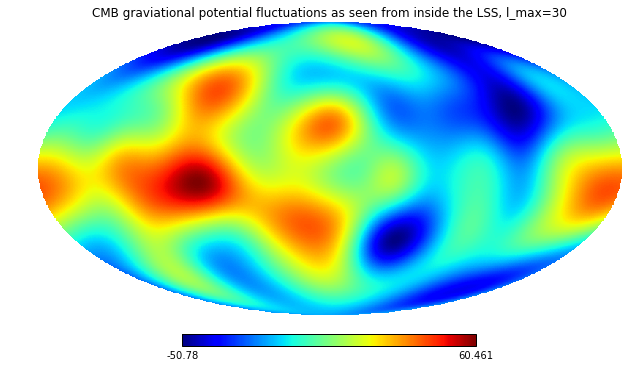

In [134]:
#Simulation with truncated_lmax=30
We2 = beatbox.Universe()
We2.truncated_nmax=6
We2.truncated_lmax=30
We2.generate_a_random_potential_field(truncated_nmax=We2.truncated_nmax, truncated_nmin=1, Pdist=1, Pmax=np.pi, Pvar=np.pi/8)
We2.transform_3D_potential_into_alm(truncated_nmax=6, truncated_nmin=1,truncated_lmax=30, truncated_lmin=1,usedefault=0)
We2.show_CMB_T_map(from_perspective_of="observer")


yt : [INFO     ] 2016-02-17 19:36:18,144 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 19:36:18,145 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 19:36:18,146 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 19:36:18,147 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 19:36:18,148 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 19:36:18,189 Loading field plugins.
yt : [INFO     ] 2016-02-17 19:36:18,193 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 19:36:18,194 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 19:36:18,195 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 19:36:18,195 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 19:36:18,196 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 19:36:18,197 Loaded geometric (112 ne


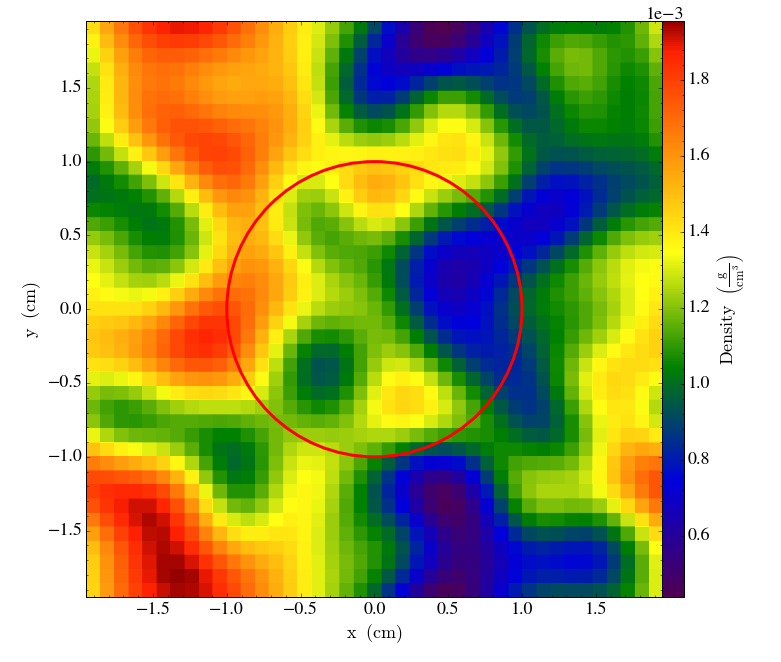

yt : [INFO     ] 2016-02-17 19:36:22,796 Saving plot phi_Slice_z_density.png


In [135]:
import yt
We2.show_potential_with_yt(N_layer=5, alpha_norm=1.0, cmap='BrBG', Proj=0, Slice=1, gifmaking=0, show3D=0)

We now simulate a Universe with $n_{max}=2$ and plot spherical harmonics up to $l_{max}=8$.

Generated  32  potential Fourier coefficients
 with phases uniformly distributed between 0 and  3.14159265359
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.0001561
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


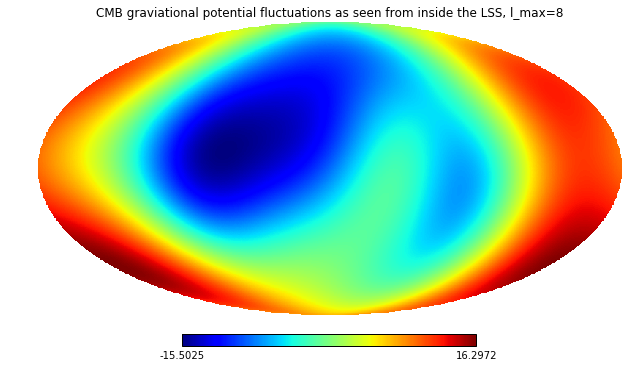

In [146]:
#Make another universe with truncated_lmax=8
We3 = beatbox.Universe()
We3.truncated_nmax=2
We3.truncated_lmax=8
We3.generate_a_random_potential_field(truncated_nmax=2, truncated_nmin=1, Pdist=1, Pmax=np.pi, Pvar=np.pi/8)
We3.transform_3D_potential_into_alm(truncated_nmax=2, truncated_nmin=1,truncated_lmax=8, truncated_lmin=0,usedefault=0)
We3.show_CMB_T_map(from_perspective_of="observer")

yt : [INFO     ] 2016-02-17 19:41:29,679 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 19:41:29,680 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 19:41:29,681 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 19:41:29,682 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 19:41:29,682 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 19:41:29,729 Loading field plugins.
yt : [INFO     ] 2016-02-17 19:41:29,730 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 19:41:29,731 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 19:41:29,731 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 19:41:29,732 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 19:41:29,733 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 19:41:29,734 Loaded geometric (112 ne


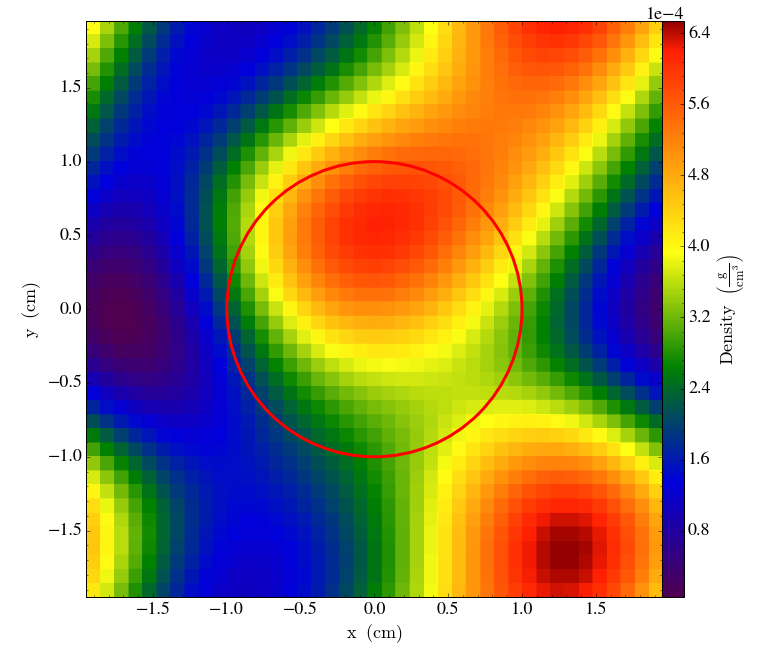

yt : [INFO     ] 2016-02-17 19:41:34,164 Saving plot phi_Slice_z_density.png


In [147]:
import yt
We3.show_potential_with_yt(N_layer=5, alpha_norm=1.0, cmap='BrBG', Proj=0, Slice=1, gifmaking=0, show3D=0)

# Test: Reconstructing the $T$ map from 3D samples of phi $\phi$
Lets reconstruct the Mollweide from Roger's data:

In [3]:
We4 = beatbox.Universe()

In [4]:
f_n, k_y, k_x, k_z= We4.load_mathematica_data()


In [5]:
print k_x.shape, k_y.shape, k_z.shape

(122,) (122,) (122,)


In [6]:
#In case we need n1, n2, n3 at some point...:
n1, n2, n3 = (k_x/(np.pi/2)).astype(int), (k_y/(np.pi/2)).astype(int), (k_z/(np.pi/2)).astype(int)
k_norm=np.sqrt(k_x**2+k_y**2+k_z**2)
k, theta, phi = k_norm[:61], np.arctan2(k_y[:61],k_x[:61]), np.arccos(k_z[:61]/k_norm[:61])
theta[np.isnan(theta)] = np.pi/2.0

In [7]:
NY = (We4.truncated_lmax + 1)**2-(We4.truncated_lmin)**2
# The n index spans 2x that length, 1st half for the cos coefficients, 2nd half
#    for the sin coefficients
NN = len(f_n)
R = np.zeros([NY,NN], dtype=np.complex128)

In [8]:
from scipy.special import sph_harm,sph_jn
lms=[(l, m) for l in range(We4.truncated_lmin,We4.truncated_lmax+1) for m in range(-l, l+1)]
# Get ready to loop over y
y=0
A=[sph_jn(We4.truncated_lmax,ki)[0] for ki in k]        
# Loop over y, computing elements of R_yn 
for i in lms:        
    l=i[0]
    m=i[1]

    trigpart = np.cos(np.pi*l/2.0)
    B=np.asarray([A[ki][l] for ki in range(len(k))])
            
    R[y,:NN/2] = 4.0 * np.pi * sph_harm(m,l,theta,phi).reshape(NN/2)*B.reshape(NN/2) * trigpart
    trigpart = np.sin(np.pi*l/2.0)
    R[y,-1:NN/2-1:-1] = 4.0 * np.pi * sph_harm(m,l,theta,phi).reshape(NN/2)*B.reshape(NN/2)* trigpart
                
    y=y+1

In [9]:
ay=np.dot(R,f_n)
We4.ay=ay
# Reorganize a_y into a_lm
We4.ay2alm(ay, usedefault=1)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


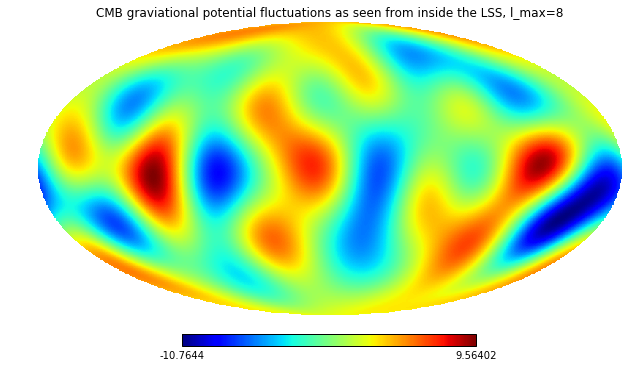

In [37]:
#We4.alm=-1*We4.alm
We4.show_CMB_T_map(from_perspective_of="observer")
np.savetxt( "data/Rogersay.txt", We4.ay.view(float))

This is exactly Fig 3 b from the proposal! Hurray!!

## Independent test: Fourier transform the $f_n$'s to real space, cut manually a sphere of radius $=1$, and do a Mollweide projection

In [148]:
# Initialize a universe with the right n_min, n_max, l_min, l_max
We6 = beatbox.Universe()
We6.truncated_nmax=3
We6.truncated_nmin=0
We6.truncated_lmax=8
We6.truncated_lmin=0

f_n, k_x, k_y, k_z = We6.load_mathematica_data()

In [149]:
# Do a manual Fourier transform (slow for high resolution x grid)
x,y,z=np.mgrid[-2:2:401*1j,-2:2:401*1j,-2:2:401*1j]
RealPhi = np.zeros(x.shape,dtype=np.complex128)
for i in range(len(k_x)/2):
    phase = k_x[i] * x + k_y[i] * y + k_z[i] * z
    RealPhi += (f_n[i] * np.cos(phase)+f_n[len(k_x)-1-i]*np.sin(phase))*We6.Deltak**3


In [154]:
We6.phi = RealPhi.real
We6.Pdist = 1
We6.Pmax = 2*np.pi

yt : [INFO     ] 2016-02-17 21:15:33,190 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 21:15:33,191 Parameters: domain_dimensions         = [401 401 401]
yt : [INFO     ] 2016-02-17 21:15:33,192 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 21:15:33,193 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 21:15:33,194 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 21:15:33,254 Loading field plugins.
yt : [INFO     ] 2016-02-17 21:15:33,255 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 21:15:33,256 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 21:15:33,257 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 21:15:33,258 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 21:15:33,261 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 21:15:33,261 Loaded geometric (112


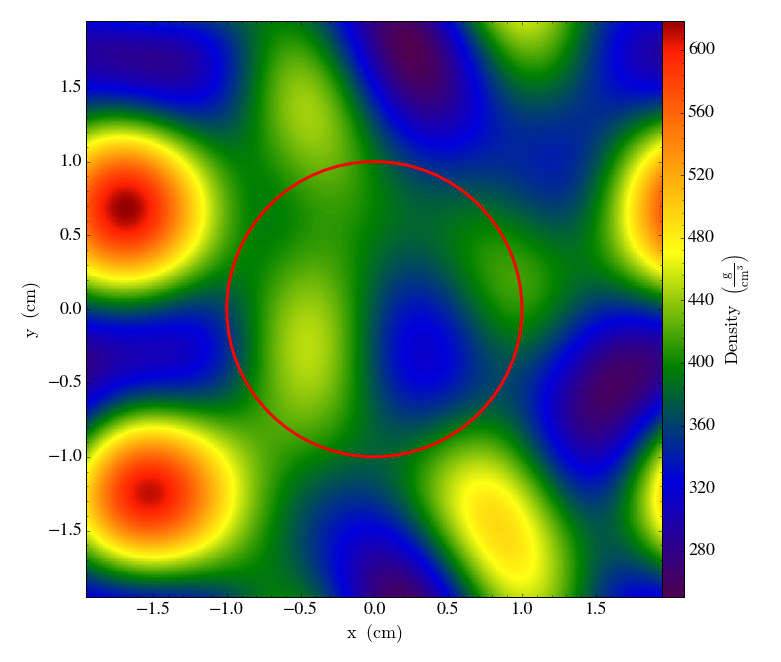

yt : [INFO     ] 2016-02-17 21:16:50,532 Saving plot phi_Slice_z_density.png


In [155]:
We6.show_potential_with_yt(0,  N_layer=10, cmap='BrBG',show3D=0, Slice=1)

And this is exactly Figure 3a from the proposal! Yay!


To do the projection, cut the x=1 sphere and project using a Mollweide projection

In [159]:
x_vec=np.sqrt(x**2+y**2+z**2)
unit_norm_ind=(x_vec==1)
#unit_norm_ind_upper=(x_vec<1.01)
#unit_norm_ind_lower=(0.99<x_vec)
#unit_norm_ind=unit_norm_ind_upper*unit_norm_ind_lower

In [160]:
polar_theta, polar_phi=np.arctan2(y[unit_norm_ind], x[unit_norm_ind]), np.arccos(z[unit_norm_ind]/x_vec[unit_norm_ind])
polar_theta[np.isnan(polar_theta)] = np.pi/2.0

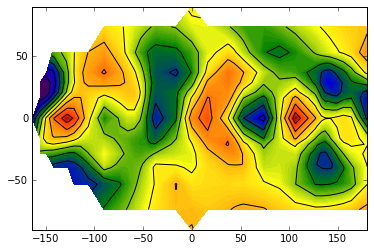

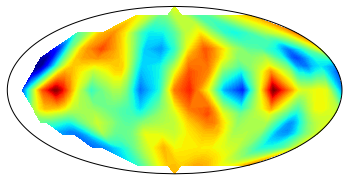

In [161]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Z=np.zeros(len(We6.phi[unit_norm_ind]))
Z = We6.phi[unit_norm_ind]

points=np.zeros((len(polar_theta),2))
points[:,0]=polar_theta
points[:,1]=polar_phi
from scipy.interpolate import griddata
utheta,uphi=np.unique(polar_theta), np.unique(polar_phi)
phiphi,thetatheta=np.meshgrid(utheta,uphi)
ZZ= griddata(points, Z.reshape(len(Z)), (phiphi,thetatheta), method='cubic')

plt.figure()
ax = plt.subplot(111)#, projection='mollweide')
ax.contourf((phiphi)*360/(2*np.pi),(thetatheta-np.pi/2)*360/(2*np.pi), ZZ,100)
ax.contour((phiphi)*360/(2*np.pi),(thetatheta-np.pi/2)*360/(2*np.pi), ZZ,10,colors='k')

plt.show()

m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(phiphi,thetatheta, ZZ, 10, colors='k',latlon=True)
m.contourf((phiphi)*360/(2*np.pi),(thetatheta-np.pi/2)*360/(2*np.pi), ZZ, 100, cmap=plt.cm.jet,latlon=True)

plt.show()

And this works!! Yay!